#Question 2

In [1]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import decode_predictions
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Input, Flatten, Lambda, Dropout
from keras.models import Model
import tensorflow.keras as K
from tensorflow.keras.utils import to_categorical 
from keras.datasets import cifar10

#Part C

In [2]:
# loading VGG19 model for part C with default input shape (224,224,3)
model1 = VGG19()
# summarizing the model
model1.summary()

574726144/574710816 [==============================] - 26s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

---
> Loading Image and Apply Preprocessing 

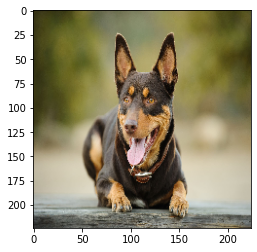

In [3]:
# loading image
image = load_img('test.jpg', target_size = (224, 224))
# converting the image to numpy array
my_image = img_to_array(image)
# reshaping data for VGG19
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
# preparing the image for VGG19
my_image = preprocess_input(my_image)
# displaying image
plt.imshow(image)
plt.show()

---
>Predicting 3 highest probabilities

In [4]:
# predicting the output classes
Y_hat = model1.predict(my_image)
# converting the Y_hat Prediction to class labels
pre_labels = decode_predictions(Y_hat)
# determining 3 highest probabilities
pre_label1 = pre_labels[0][0]
pre_label2 = pre_labels[0][1]
pre_label3 = pre_labels[0][2]
# displaying 3 highest probabilities
print('%s (%.2f%%)' % (pre_label1[1], pre_label1[2]*100))
print('%s (%.2f%%)' % (pre_label2[1], pre_label2[2]*100))
print('%s (%.2f%%)' % (pre_label3[1], pre_label3[2]*100))

49152/35363 [=========================================] - 0s 0us/step
kelpie (65.39%)
Doberman (27.85%)
Rottweiler (1.23%)


#Part B & D

---
> Loading VGG19 Model with (64,64,3) input shape  

In [2]:
# loading VGG19 model for part D with input shape (64,64,3)
model2 = VGG19(include_top = False, weights='imagenet', input_shape = (64, 64, 3))
model2.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

---
> Part B) Transfer Learning- Freeze VGG19 Layers and Add FC Layers to the Model

In [3]:
# We don't train the model layers again, because they are already trained
for layer in model2.layers:
    layer.trainable = False
    
# Adding fully connected layers
x = Flatten()(model2.output)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(10,activation='softmax')(x)
model = Model(inputs = model2.input, outputs = prediction)

# Summarizing model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

---
> Part D) Loading cifar10 dataset

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

---
> Preprocessing the data

In [6]:
#Preprocessing the data
x_p_train = preprocess_input(x_train)
x_p_test = preprocess_input(x_test)
# One-Hot Encoding the labels
y_p_train = K.utils.to_categorical(y_train, 10)
y_p_test = K.utils.to_categorical(y_test, 10)
# Resizing the pictures
numberOfImages = x_p_train.shape[0]
new_arr = np.zeros((numberOfImages, 64, 64, 3))
for i in range(numberOfImages):
    new_arr[i] = cv2.resize(x_p_train[i,:,:,:],(64,64))
x_p_r_train = new_arr
numberOfImages = x_p_test.shape[0]
new_arr = np.zeros((numberOfImages, 64, 64, 3))
for i in range(numberOfImages):
    new_arr[i] = cv2.resize(x_p_test[i,:,:,:],(64,64))
x_p_r_test = new_arr
print("New shape of x_train is ",x_p_r_train.shape)
print("New shape of x_test  is ",x_p_r_test.shape)

New shape of x_train is  (50000, 64, 64, 3)
New shape of x_test  is  (10000, 64, 64, 3)


---
> Compiling the Model

In [7]:
# Compiling the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# Training the model
hist = model.fit(x_p_r_train, y_p_train, validation_split = 0.15, epochs = 10, batch_size = 128)

Epoch 1/10
333/333 [==============================] - 65s 150ms/step - loss: 2.1968 - accuracy: 0.5233 - val_loss: 0.9388 - val_accuracy: 0.6989
Epoch 2/10
333/333 [==============================] - 47s 142ms/step - loss: 1.0334 - accuracy: 0.6664 - val_loss: 0.8233 - val_accuracy: 0.7407
Epoch 3/10
333/333 [==============================] - 47s 142ms/step - loss: 0.8828 - accuracy: 0.7114 - val_loss: 0.7769 - val_accuracy: 0.7517
Epoch 4/10
333/333 [==============================] - 47s 142ms/step - loss: 0.7864 - accuracy: 0.7375 - val_loss: 0.7278 - val_accuracy: 0.7633
Epoch 5/10
333/333 [==============================] - 47s 141ms/step - loss: 0.7266 - accuracy: 0.7588 - val_loss: 0.7101 - val_accuracy: 0.7723
Epoch 6/10
333/333 [==============================] - 47s 142ms/step - loss: 0.6849 - accuracy: 0.7729 - val_loss: 0.6922 - val_accuracy: 0.7703
Epoch 7/10
333/333 [==============================] - 51s 152ms/step - loss: 0.6414 - accuracy: 0.7851 - val_loss: 0.6819 - val_ac

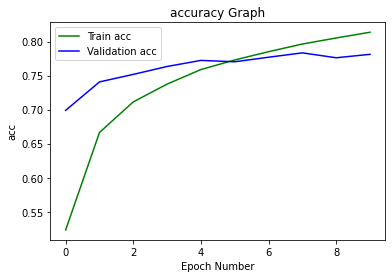

In [8]:
plt.subplots(figsize = (6,4))
plt.plot(hist.epoch, hist.history["accuracy"], color = "green", label = "Train acc")
plt.plot(hist.epoch, hist.history["val_accuracy"], color = "blue", label = "Validation acc")
plt.xlabel("Epoch Number")
plt.ylabel("acc")
plt.legend()
plt.title("accuracy Graph")
plt.show()

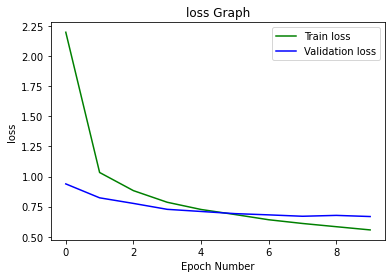

In [9]:
plt.subplots(figsize = (6,4))
plt.plot(hist.epoch, hist.history["loss"], color = "green", label = "Train loss")
plt.plot(hist.epoch, hist.history["val_loss"], color = "blue", label = "Validation loss")
plt.xlabel("Epoch Number")
plt.ylabel("loss")
plt.legend()
plt.title("loss Graph")
plt.show()

In [12]:
# Determining Traning Time & Test Loss & Test mae
#Training_Time = end - start
#print ('Training_Time:', Training_Time)
test_loss, test_acc = model.evaluate(x_p_r_test, y_p_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_acc:', test_acc)

Test_loss: 0.6624267101287842
Test_acc: 0.786300003528595
